In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving World_development_mesurement.xlsx to World_development_mesurement (1).xlsx


In [3]:
df = pd.read_excel("World_development_mesurement.xlsx")



In [4]:
df.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [5]:


print("Shape before cleaning:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())


Shape before cleaning: (2704, 25)

Columns: ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country', 'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']

Data Types:
 Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interes

In [6]:

# 🚫  Drop Irrelevant Columns

# Convert blank or placeholder values to NaN
df.replace([" ", "", "NA", "N/A", "..", "---"], np.nan, inplace=True)

# Drop 'Number of records' column (if exists)
drop_cols = ['Number of records']

# Drop columns with >40% missing or single unique value
too_many_missing = [col for col in df.columns if df[col].isnull().mean() > 0.4]
single_unique = [col for col in df.columns if df[col].nunique() <= 1]

# Combine all columns to drop
drop_cols += too_many_missing + single_unique
drop_cols = list(set(drop_cols))

print("\nDropping columns:", drop_cols)
df.drop(columns=drop_cols, inplace=True, errors='ignore')
print("Shape after dropping columns:", df.shape)



Dropping columns: ['Number of Records', 'Business Tax Rate', 'Hours to do Tax', 'Number of records', 'Ease of Business']
Shape after dropping columns: (2704, 21)


In [7]:

# 🚫 Drop 'Days to start business


# Drop the column safely (won't error if it's missing)
df.drop(columns=['Days to Start Business'], inplace=True, errors='ignore')

# Show dataset shape after dropping
print("✅ Shape after dropping 'Days to start business':", df.shape)




✅ Shape after dropping 'Days to start business': (2704, 20)


In [8]:

#  Fix Numeric Columns and Handle Missing Values


import numpy as np
import pandas as pd

# Detect columns that are object type but might actually be numeric (e.g., contain $ or ,)
possible_num_cols = df.select_dtypes(include='object').columns.tolist()

print(" Columns currently detected as object type (may include symbols):")
print(possible_num_cols)

# Try converting object columns to numeric by removing symbols
for col in possible_num_cols:
    # Skip 'Country' column to prevent it from being converted
    if col == 'Country':
        continue

    # Remove common symbols like $, ₹, %, and commas
    df[col] = df[col].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)

    # Convert to numeric (invalid parsing becomes NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-identify numeric and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Ensure 'Country' stays as object type
df['Country'] = df['Country'].astype(str)
if 'Country' not in cat_cols:
    cat_cols.append('Country')

print("\n✅ Converted these columns to numeric successfully:", [col for col in possible_num_cols if col != 'Country'])
print("📝 Current numeric columns:", num_cols)
print("📝 Current categorical columns:", cat_cols)


 Columns currently detected as object type (may include symbols):
['Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']

✅ Converted these columns to numeric successfully: ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']
📝 Current numeric columns: ['Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']
📝 Current categorical columns: ['Country']


In [9]:
print("Shape before cleaning:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())

Shape before cleaning: (2704, 20)

Columns: ['Birth Rate', 'CO2 Emissions', 'Country', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']

Data Types:
 Birth Rate                float64
CO2 Emissions             float64
Country                    object
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total    

In [10]:

#  Handle Missing Values

# Fill numeric columns with median safely
for col in num_cols:
    # Check if column is really numeric (float or int)
    if pd.api.types.is_numeric_dtype(df[col]):
        # Compute median safely (skip NaNs)
        median_value = df[col].median()
        # Fill NaNs with median using direct assignment
        df[col] = df[col].fillna(median_value)


# Confirm Conversion & Missing Values

print("\n Data Types After Conversion:\n", df.dtypes)
print("\nMissing Values After Filling:", df.isnull().sum().sum())
print("\nShape after cleaning:", df.shape)




 Data Types After Conversion:
 Birth Rate                float64
CO2 Emissions             float64
Country                    object
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

Missing Values After Filling: 0

Shape after cleaning: (2704, 20)


In [11]:
print("\nMissing Values after Cleaning:\n", df.isnull().sum())


Missing Values after Cleaning:
 Birth Rate                0
CO2 Emissions             0
Country                   0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64


In [12]:
df.head()

Birth Rate  CO2 Emissions       Country  Energy Usage           GDP  \
0       0.020        87931.0       Algeria       26998.0  5.479006e+10   
1       0.050         9542.0        Angola        7499.0  9.129595e+09   
2       0.043         1617.0         Benin        1983.0  2.359122e+09   
3       0.027         4276.0      Botswana        1836.0  5.788312e+09   
4       0.046         1041.0  Burkina Faso       14338.0  2.610959e+09   

   Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0             0.035               60.0                  0.034             0.0   
1             0.034               22.0                  0.128             0.0   
2             0.043               15.0                  0.090             0.0   
3             0.047              152.0                  0.054             0.0   
4             0.051               12.0                  0.096             0.0   

   Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0             0.100                    71.0                  67.0   
1             1.032                    47.0                  44.0   
2             0.120                    57.0                  53.0   
3             0.155                    52.0                  49.0   
4             0.120                    52.0                  49.0   

   Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0                 0.0            0.342             0.619           0.039   
1                 0.0            0.476             0.499           0.025   
2                 0.0            0.454             0.517           0.029   
3                 0.1            0.383             0.587           0.029   
4                 0.0            0.468             0.505           0.028   

   Population Total  Population Urban  Tourism Inbound  Tourism Outbound  
0          31719449             0.599      102000000.0       193000000.0  
1          13924930             0.324       34000000.0       146000000.0  
2           6949366             0.383       77000000.0        50000000.0  
3           1755375             0.532      227000000.0       209000000.0  
4          11607944             0.178       23000000.0        30000000.0

In [13]:
from sklearn.preprocessing import StandardScaler

# Columns to scale (exclude categorical)
numeric_cols_to_scale = [col for col in num_cols if col not in cat_cols]

scaler = StandardScaler()

# Fit and transform, store in a new DataFrame
df_scaled = df.copy()  # keep original df intact
df_scaled[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

# Now:
# df -> original data
# df_scaled -> scaled numeric columns (original categorical columns remain the same)


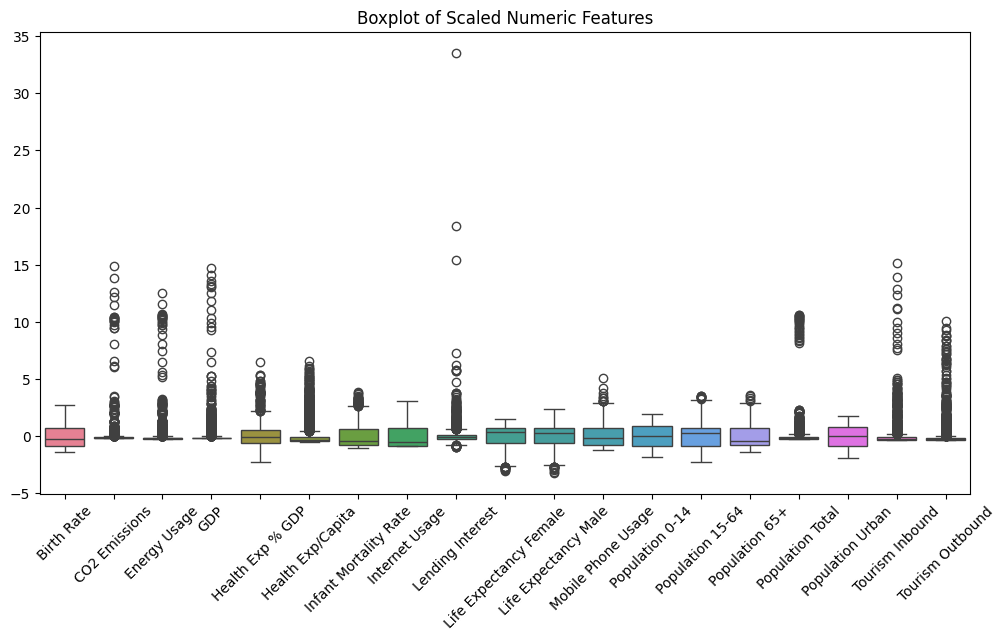

In [14]:

# Visualize Scaled Data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title("Boxplot of Scaled Numeric Features")
plt.xticks(rotation=45)
plt.show()

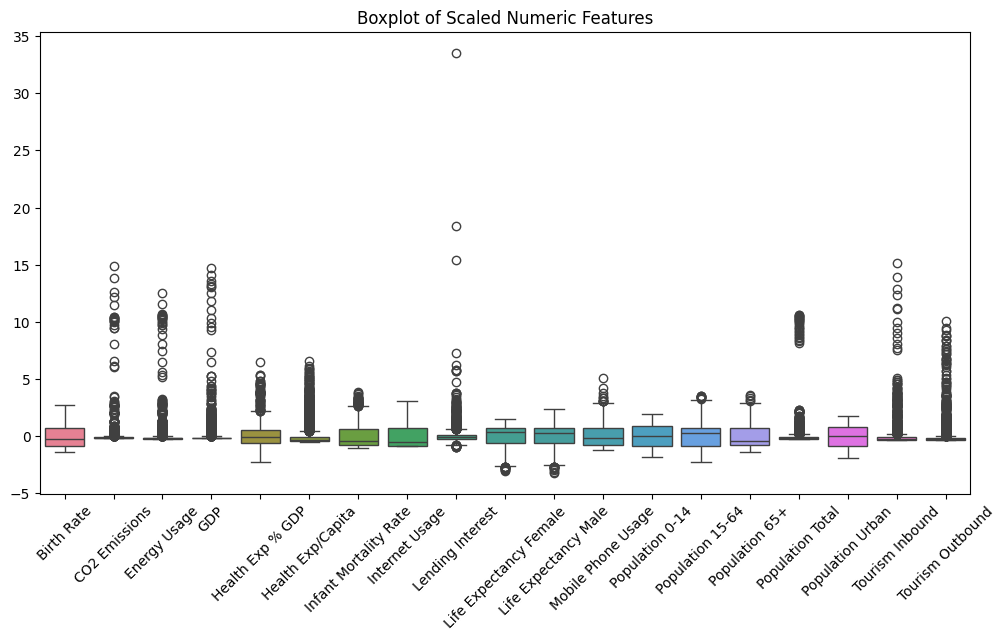

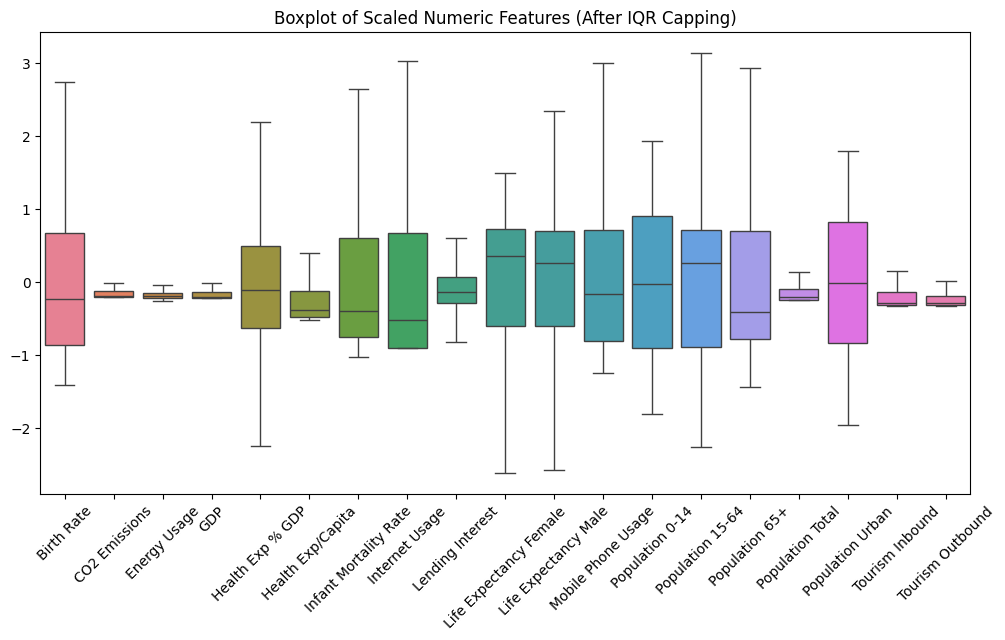

In [15]:

#  Visualize Scaled Data (Numeric Only)

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols_scaled = df_scaled.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[numeric_cols_scaled])
plt.title("Boxplot of Scaled Numeric Features")
plt.xticks(rotation=45)
plt.show()


#  IQR Capping for Numeric Columns


# Apply IQR capping only on numeric columns
for col in numeric_cols_scaled:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df_scaled[col] = df_scaled[col].clip(lower=lower_bound, upper=upper_bound)


#  Visualize Scaled & Capped Data

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[numeric_cols_scaled])
plt.title("Boxplot of Scaled Numeric Features (After IQR Capping)")
plt.xticks(rotation=45)
plt.show()


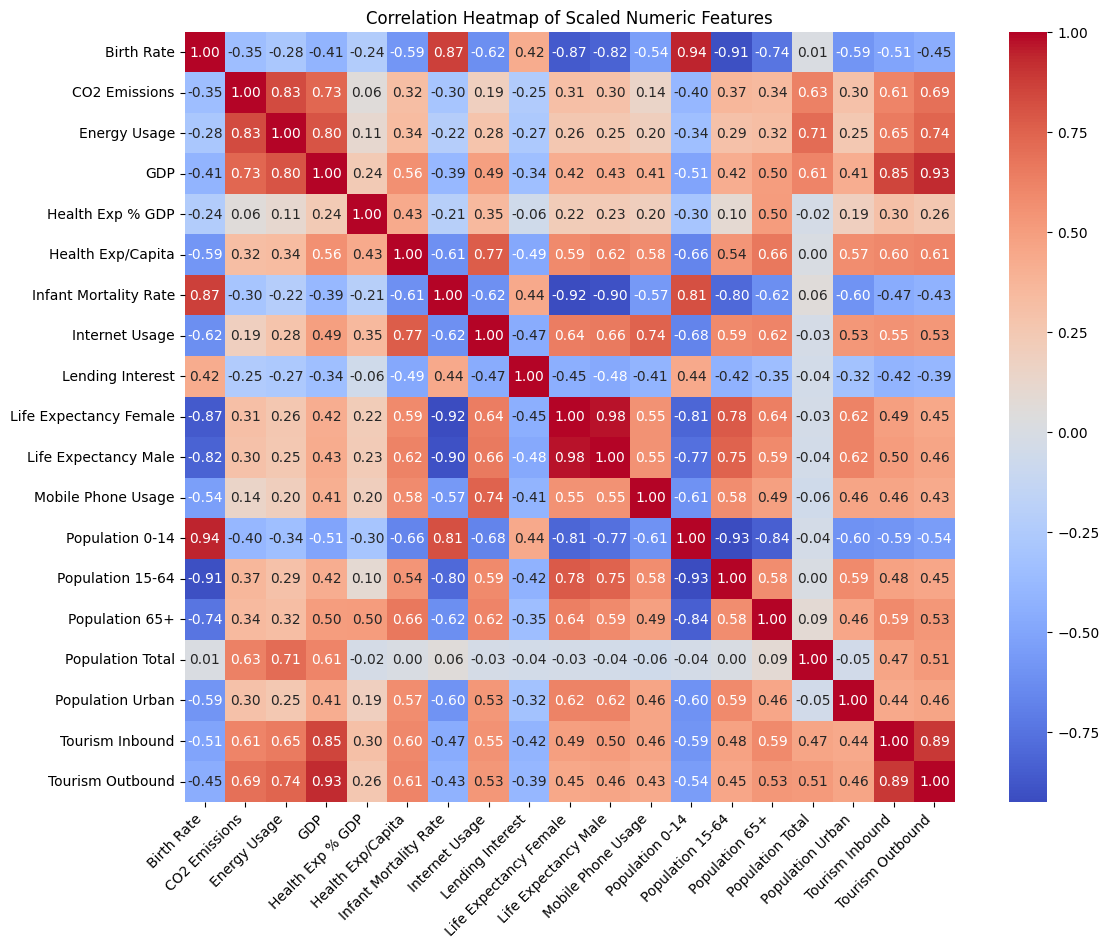

In [16]:

#  Correlation Heatmap (Scaled Numeric Columns)

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for scaled numeric columns
corr_matrix = df_scaled[numeric_cols_scaled].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Scaled Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [17]:
df.head()

Birth Rate  CO2 Emissions       Country  Energy Usage           GDP  \
0       0.020        87931.0       Algeria       26998.0  5.479006e+10   
1       0.050         9542.0        Angola        7499.0  9.129595e+09   
2       0.043         1617.0         Benin        1983.0  2.359122e+09   
3       0.027         4276.0      Botswana        1836.0  5.788312e+09   
4       0.046         1041.0  Burkina Faso       14338.0  2.610959e+09   

   Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0             0.035               60.0                  0.034             0.0   
1             0.034               22.0                  0.128             0.0   
2             0.043               15.0                  0.090             0.0   
3             0.047              152.0                  0.054             0.0   
4             0.051               12.0                  0.096             0.0   

   Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0             0.100                    71.0                  67.0   
1             1.032                    47.0                  44.0   
2             0.120                    57.0                  53.0   
3             0.155                    52.0                  49.0   
4             0.120                    52.0                  49.0   

   Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0                 0.0            0.342             0.619           0.039   
1                 0.0            0.476             0.499           0.025   
2                 0.0            0.454             0.517           0.029   
3                 0.1            0.383             0.587           0.029   
4                 0.0            0.468             0.505           0.028   

   Population Total  Population Urban  Tourism Inbound  Tourism Outbound  
0          31719449             0.599      102000000.0       193000000.0  
1          13924930             0.324       34000000.0       146000000.0  
2           6949366             0.383       77000000.0        50000000.0  
3           1755375             0.532      227000000.0       209000000.0  
4          11607944             0.178       23000000.0        30000000.0

In [18]:
df_scaled.head()

Birth Rate  CO2 Emissions       Country  Energy Usage       GDP  \
0   -0.233864      -0.046899       Algeria     -0.135363 -0.174562   
1    2.469335      -0.189777        Angola     -0.226814 -0.216569   
2    1.838589      -0.204222         Benin     -0.252684 -0.222797   
3    0.396882      -0.199376      Botswana     -0.253374 -0.219643   
4    2.108909      -0.205272  Burkina Faso     -0.194739 -0.222566   

   Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0         -1.162045          -0.479956               0.084186       -0.908914   
1         -1.202383          -0.507102               2.642134       -0.908914   
2         -0.839336          -0.512102               2.033099       -0.908914   
3         -0.677982          -0.414235               0.780226       -0.908914   
4         -0.516628          -0.514245               2.241911       -0.908914   

   Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0         -0.274918               -0.033671              0.044785   
1          0.604651               -2.326553             -2.464476   
2         -0.135856               -1.371185             -1.482591   
3          0.107503               -1.848869             -1.918984   
4         -0.135856               -1.848869             -1.918984   

   Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0           -1.246165         0.384182         -0.090043       -0.683981   
1           -1.246165         1.696192         -1.882290       -0.976654   
2           -1.246165         1.480788         -1.613453       -0.893033   
3           -1.028797         0.785618         -0.567976       -0.893033   
4           -1.246165         1.617863         -1.792677       -0.913938   

   Population Total  Population Urban  Tourism Inbound  Tourism Outbound  
0          0.002110          0.147449        -0.328776         -0.311777  
1         -0.141087         -0.976530        -0.334026         -0.315641  
2         -0.197221         -0.735385        -0.330706         -0.323534  
3         -0.239018         -0.126393        -0.319126         -0.310461  
4         -0.159732         -1.573260        -0.334875         -0.325178

# **PCA**

Explained Variance Ratio (Raw Data): [9.99935186e-01 4.62139691e-05 1.85892660e-05 1.10945239e-08
 8.85236701e-14 2.31646424e-15 1.05956520e-18 1.24687199e-22
 4.31238974e-24 1.74694601e-24 1.24026791e-25 2.85421156e-26
 1.58004033e-26 1.16216193e-26 3.27283941e-27 7.85235393e-28
 8.87202408e-29 6.81469329e-31 0.00000000e+00]
Eigenvalues (Raw Data): [1.18218290e+24 5.46369052e+19 2.19773367e+19 1.31166066e+16
 1.04657952e+11 2.73866191e+09 1.25268105e+06 1.47412629e+02
 5.09836384e+00 2.06534357e+00 1.46631855e-01 3.37441880e-02
 1.86801773e-02 1.37397701e-02 3.86934557e-03 9.28352023e-04
 1.04890350e-04 8.05673606e-07 0.00000000e+00]


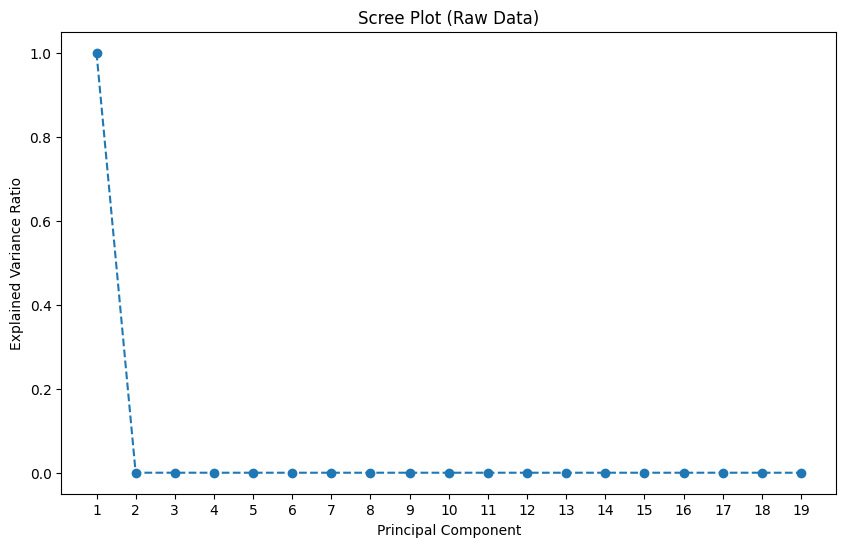

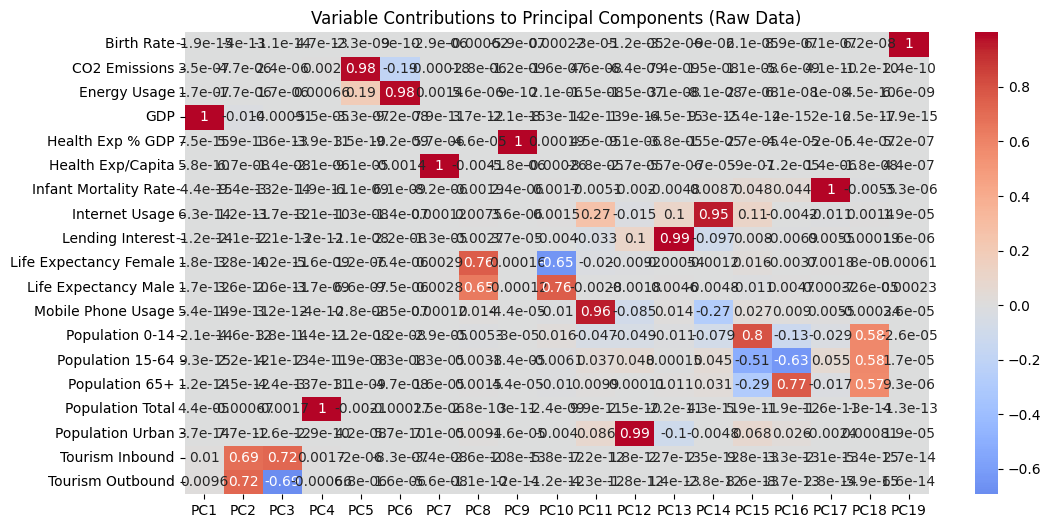

In [19]:

# PCA on Raw Numeric Data

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns from the original df
X_raw = df.select_dtypes(include=np.number).copy()

# Fill any remaining NaNs safely with median
X_raw = X_raw.fillna(X_raw.median())

# Fit PCA
pca_raw = PCA()
X_pca_raw = pca_raw.fit_transform(X_raw)

# Explained variance and eigenvalues
explained_var_raw = pca_raw.explained_variance_ratio_
eigenvalues_raw = pca_raw.explained_variance_

print("Explained Variance Ratio (Raw Data):", explained_var_raw)
print("Eigenvalues (Raw Data):", eigenvalues_raw)

# Scree Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var_raw)+1), explained_var_raw, marker='o', linestyle='--')
plt.title("Scree Plot (Raw Data)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_var_raw)+1))
plt.show()

# Variable Contributions Heatmap
loadings_raw = pd.DataFrame(pca_raw.components_.T,
                            columns=[f'PC{i+1}' for i in range(len(explained_var_raw))],
                            index=X_raw.columns)
plt.figure(figsize=(12,6))
sns.heatmap(loadings_raw, annot=True, cmap="coolwarm", center=0)
plt.title("Variable Contributions to Principal Components (Raw Data)")
plt.show()


Explained Variance Ratio (Scaled Data): [6.71269748e-01 9.09591550e-02 6.84053667e-02 5.12484684e-02
 4.35784459e-02 2.43490266e-02 1.99563563e-02 8.92541356e-03
 7.87124072e-03 5.12835542e-03 3.41863306e-03 2.43716874e-03
 1.32023504e-03 6.28251575e-04 2.50281597e-04 1.37551145e-04
 5.99360900e-05 3.73759411e-05 1.89905258e-05]
Eigenvalues (Scaled Data): [7.39938205e+00 1.00263946e+00 7.54029873e-01 5.64910006e-01
 4.80363626e-01 2.68398436e-01 2.19978191e-01 9.83845095e-02
 8.67644006e-02 5.65296756e-02 3.76834681e-02 2.68648225e-02
 1.45529029e-02 6.92519430e-03 2.75884496e-03 1.51622128e-03
 6.60673344e-04 4.11993642e-04 2.09331876e-04]


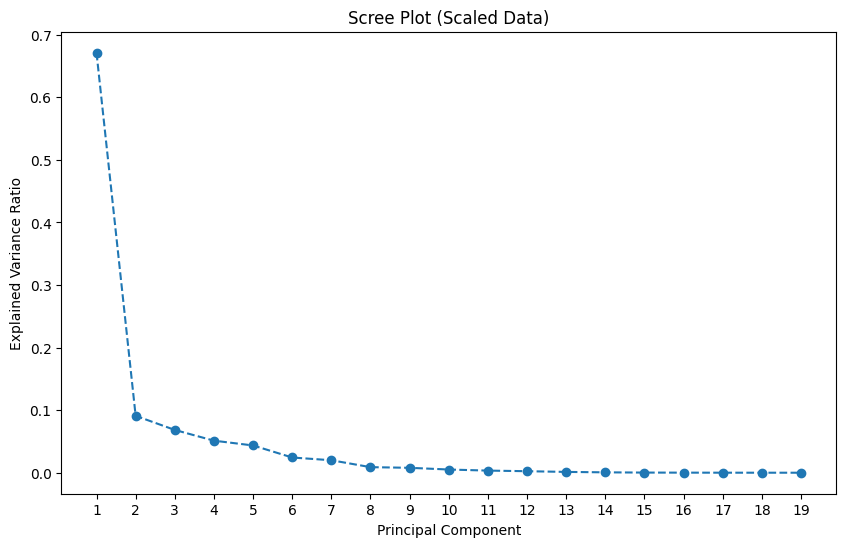

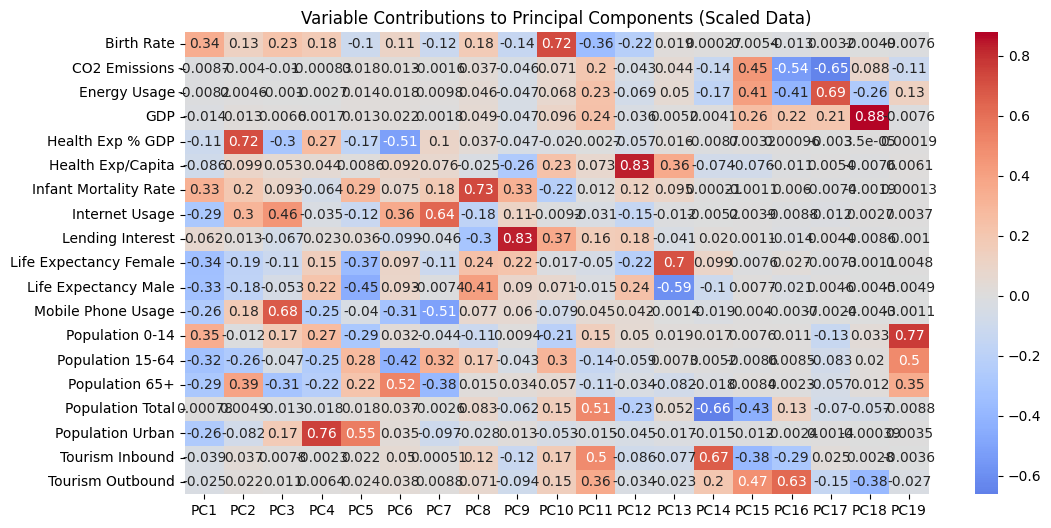

In [20]:

#  PCA on Scaled Numeric Data

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use scaled numeric data (after IQR capping)
X_scaled = df_scaled[numeric_cols_scaled].copy()

# Fill any remaining NaNs safely (if any)
X_scaled = X_scaled.fillna(X_scaled.median())

# Fit PCA
pca_scaled = PCA()
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# Explained variance and eigenvalues
explained_var_scaled = pca_scaled.explained_variance_ratio_
eigenvalues_scaled = pca_scaled.explained_variance_

print("Explained Variance Ratio (Scaled Data):", explained_var_scaled)
print("Eigenvalues (Scaled Data):", eigenvalues_scaled)

# Scree Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var_scaled)+1), explained_var_scaled, marker='o', linestyle='--')
plt.title("Scree Plot (Scaled Data)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_var_scaled)+1))
plt.show()

# Variable Contributions Heatmap
loadings_scaled = pd.DataFrame(pca_scaled.components_.T,
                               columns=[f'PC{i+1}' for i in range(len(explained_var_scaled))],
                               index=X_scaled.columns)
plt.figure(figsize=(12,6))
sns.heatmap(loadings_scaled, annot=True, cmap="coolwarm", center=0)
plt.title("Variable Contributions to Principal Components (Scaled Data)")
plt.show()



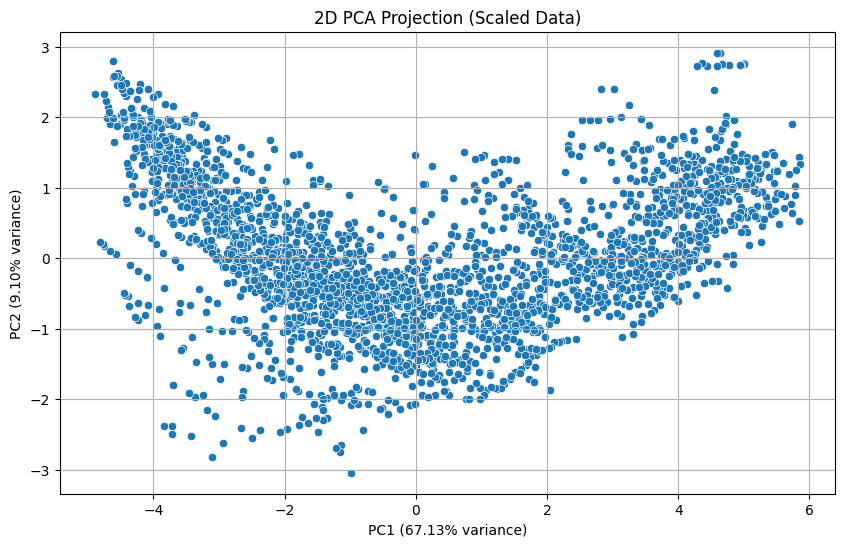

Explained Variance Ratio:
PC1: 67.13%
PC2: 9.10%


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use scaled numeric data (after IQR capping or scaling)
X = df_scaled[numeric_cols_scaled].copy()

# Fill any remaining NaNs safely
X = X.fillna(X.median())

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


# 2D Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)  # add hue='Cluster' if using clusters
plt.title("2D PCA Projection (Scaled Data)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.grid(True)
plt.show()

# Print explained variance
explained_var = pca.explained_variance_ratio_
print(f"Explained Variance Ratio:\nPC1: {explained_var[0]*100:.2f}%\nPC2: {explained_var[1]*100:.2f}%")


# K Mean Clustering

In [22]:
!pip install scikit-learn-extra


In [23]:
!pip install "numpy<2" --upgrade


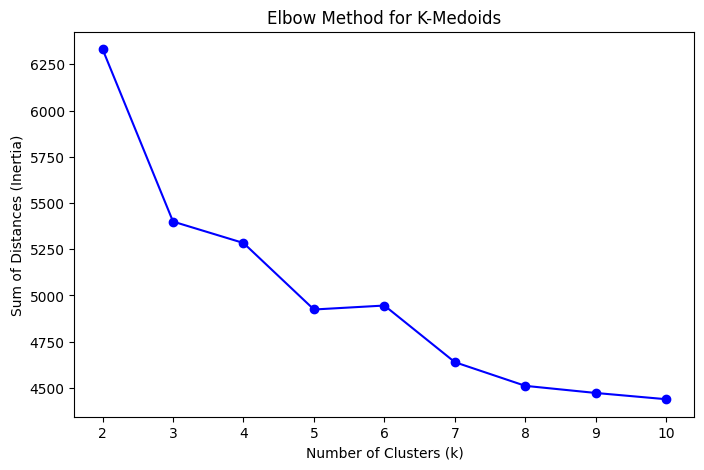

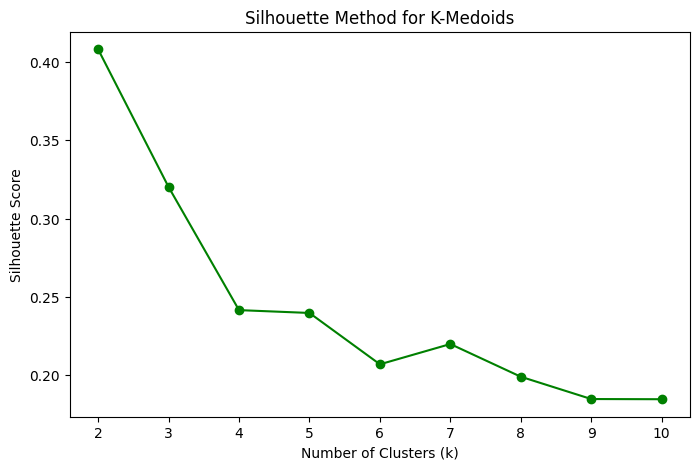

100%|██████████| 9/9 [00:28<00:00,  3.16s/it]


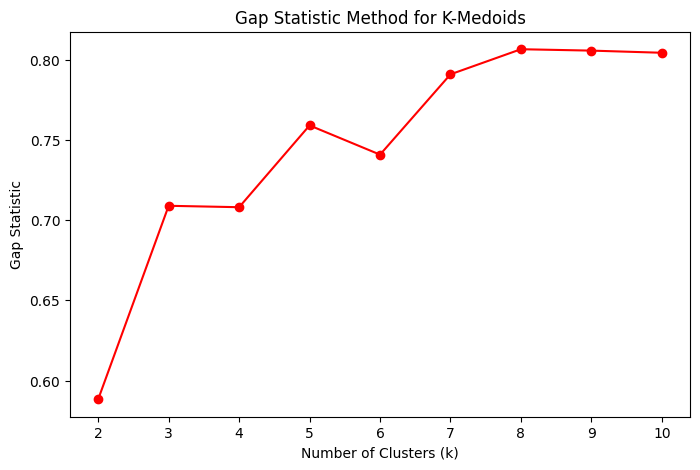

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


X = df_scaled[numeric_cols_scaled].copy()  # Scaled data already



#  Elbow Method (Inertia / Sum of Distances)

inertia = []
K_range = range(2, 11)  # Check 2 to 10 clusters

for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    kmedoids.fit(X)
    inertia.append(kmedoids.inertia_)  # Sum of distances within clusters

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Distances (Inertia)')
plt.title('Elbow Method for K-Medoids')
plt.show()


# Silhouette Method

sil_scores = []

for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    labels = kmedoids.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, 'o-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for K-Medoids')
plt.show()


#  Gap Statistic Method

from sklearn.metrics import pairwise_distances
from tqdm import tqdm

def gap_statistic(X, refs=None, n_refs=10, max_clusters=10):
    """
    Compute Gap Statistic for K-Medoids
    """
    shape = X.shape
    if refs is None:
        tops = X.max(axis=0)
        bottoms = X.min(axis=0)
        dists = np.zeros((n_refs, shape[0], shape[1]))
        for i in range(n_refs):
            dists[i] = np.random.uniform(bottoms, tops, size=shape)
    else:
        dists = refs

    gaps = np.zeros((max_clusters-1,))
    for k in tqdm(range(2, max_clusters+1)):
        kmedoids = KMedoids(n_clusters=k, random_state=42)
        kmedoids.fit(X)
        intra_disp = np.log(np.sum(np.min(pairwise_distances(X, kmedoids.cluster_centers_), axis=1)))

        ref_disps = []
        for i in range(n_refs):
            kmedoids_ref = KMedoids(n_clusters=k, random_state=42)
            kmedoids_ref.fit(dists[i])
            ref_disp = np.log(np.sum(np.min(pairwise_distances(dists[i], kmedoids_ref.cluster_centers_), axis=1)))
            ref_disps.append(ref_disp)
        gaps[k-2] = np.mean(ref_disps) - intra_disp
    return gaps

gaps = gap_statistic(X.values, n_refs=10, max_clusters=10)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), gaps, 'o-', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method for K-Medoids')
plt.show()


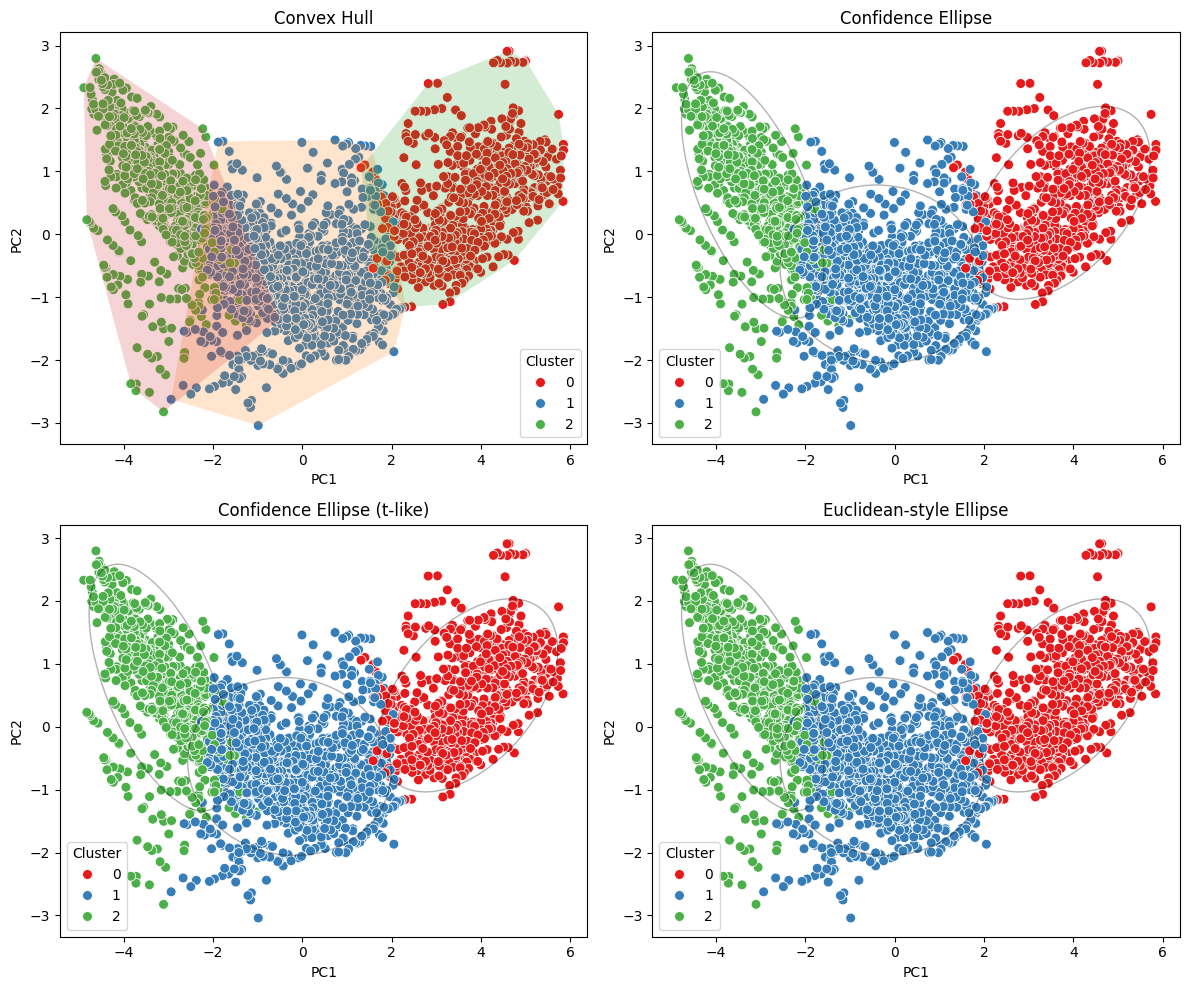

K-Means trained on 19 numeric features and saved successfully!


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from scipy.spatial import ConvexHull
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.cluster import KMeans
import joblib

# ----------------------------
# Keep only numeric features
# ----------------------------
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

X = df[numeric_features]

# ----------------------------
# Scale features
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# K-Medoids clustering
# ----------------------------
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
labels_medoid = kmedoids.fit_predict(X_scaled)

# Assign cluster labels to PCA dataframe for plotting
df_pca['Cluster'] = labels_medoid

# ----------------------------
# Functions to plot ellipses
# ----------------------------
def plot_convex_hull(df, ax=None):
    if ax is None:
        ax = plt.gca()
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1', s=50, ax=ax)
    for cluster in df['Cluster'].unique():
        points = df[df['Cluster']==cluster][['PC1','PC2']].values
        if len(points) > 2:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            ax.fill(hull_points[:,0], hull_points[:,1], alpha=0.2)
    ax.set_title('Convex Hull')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    return ax

def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0,0]*cov[1,1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x*2, height=ell_radius_y*2, facecolor=facecolor, **kwargs)
    scale_x = np.sqrt(cov[0,0]) * n_std
    scale_y = np.sqrt(cov[1,1]) * n_std
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def plot_confidence_ellipse(df, ax=None):
    if ax is None:
        ax = plt.gca()
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1', s=50, ax=ax)
    for cluster in df['Cluster'].unique():
        cluster_points = df[df['Cluster']==cluster]
        confidence_ellipse(cluster_points['PC1'].values, cluster_points['PC2'].values, ax,
                           edgecolor='black', alpha=0.3)
    ax.set_title('Confidence Ellipse')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    return ax

# ----------------------------
# Plotting
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# 1. Convex Hull
plot_convex_hull(df_pca, ax=axes[0,0])

# 2. Confidence Ellipse (Normal)
plot_confidence_ellipse(df_pca, ax=axes[0,1])

# 3. t-distribution ellipse
plot_confidence_ellipse(df_pca, ax=axes[1,0])
axes[1,0].set_title('Confidence Ellipse (t-like)')

# 4. Euclidean-style ellipse
plot_confidence_ellipse(df_pca, ax=axes[1,1])
axes[1,1].set_title('Euclidean-style Ellipse')

plt.tight_layout()
plt.show()

# ----------------------------
# Train K-Means on 19 numeric features and save model
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

joblib.dump(kmeans, "kmeans_model_19.pkl")
joblib.dump(scaler, "scaler_19.pkl")

print("K-Means trained on 19 numeric features and saved successfully!")



🔥 Top 20 Important Features (K-Means Based):

                   Feature  Importance
0             Energy Usage    5.255076
1            CO2 Emissions    4.980911
2                      GDP    4.420353
3          Tourism Inbound    3.795458
4         Population Total    3.615716
5         Tourism Outbound    3.229155
6        Health Exp/Capita    1.273152
7         Population 15-64    1.084865
8          Population 0-14    1.071054
9               Birth Rate    1.032694
10        Health Exp % GDP    1.000450
11    Life Expectancy Male    0.966017
12   Infant Mortality Rate    0.941537
13  Life Expectancy Female    0.938204
14          Internet Usage    0.796395
15          Population 65+    0.765581
16        Population Urban    0.691485
17      Mobile Phone Usage    0.599354
18        Lending Interest    0.417728


/tmp/ipython-input-2738461990.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')


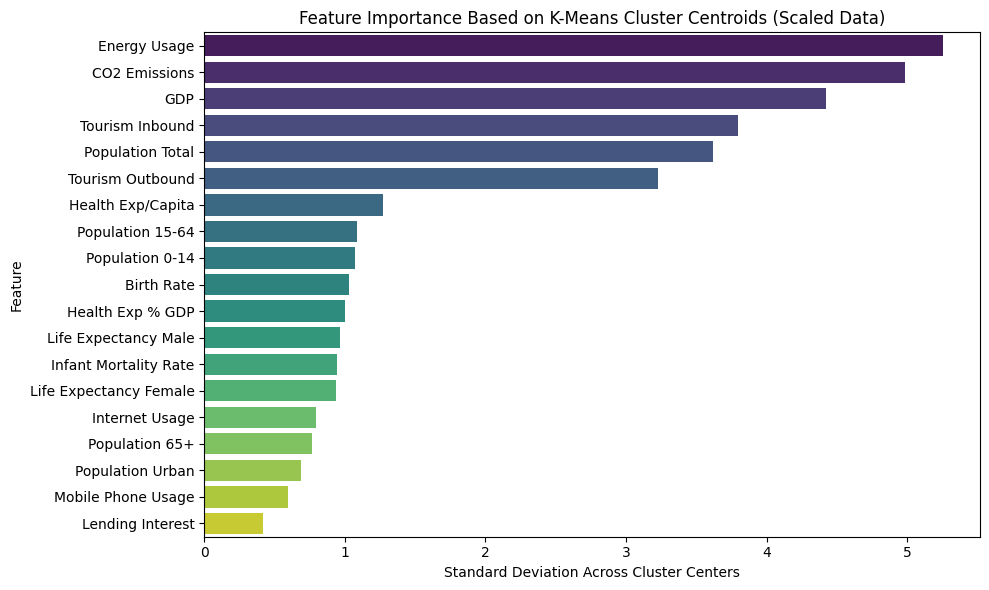

In [26]:
# ============================================
# 🌟 Feature Importance from K-Means Clustering
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the same scaled numeric data used for K-Means
X_for_importance = df_scaled[numeric_cols_scaled]

# Get the K-Means centroids as a DataFrame
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_for_importance.columns)

# Calculate how much each feature varies across clusters
feature_importance = centroids.std().sort_values(ascending=False)

# Convert to DataFrame for readability
feature_importance_df = feature_importance.reset_index()
feature_importance_df.columns = ['Feature', 'Importance']

# Print top features
print("🔥 Top 20 Important Features (K-Means Based):\n")
print(feature_importance_df.head(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance Based on K-Means Cluster Centroids (Scaled Data)')
plt.xlabel('Standard Deviation Across Cluster Centers')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [27]:

# ----------------------------
# Select only the 19 numeric features used for clustering
# ----------------------------
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

X = df_scaled[numeric_features].copy()

# ----------------------------
# K-Means clustering with 3 clusters
# ----------------------------
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# ----------------------------
# Add cluster labels to dataframe
# ----------------------------
df_clusters = X.copy()
df_clusters['Cluster'] = labels

# ----------------------------
# Summary per cluster
# ----------------------------
# Mean per cluster
cluster_mean_summary = df_clusters.groupby('Cluster').mean()
print("✅ Mean per cluster:")
display(cluster_mean_summary)

# Standard deviation per cluster
cluster_sd_summary = df_clusters.groupby('Cluster').std()
print("✅ Standard deviation per cluster:")
display(cluster_sd_summary)

# Overall summary of numeric dataset
print("✅ Summary statistics of numeric features:")
display(df_clusters.describe().T)


✅ Mean per cluster:


Birth Rate  CO2 Emissions  Energy Usage       GDP  Health Exp % GDP  \
Cluster                                                                        
0         -0.175665      -0.152363     -0.179247 -0.181650         -0.334467   
1         -0.919871      -0.134730     -0.150128 -0.121039          0.496635   
2          1.380952      -0.192549     -0.203450 -0.211576         -0.205525   

         Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
Cluster                                                             
0                -0.348904              -0.282571       -0.357879   
1                 0.087421              -0.799801        1.118207   
2                -0.476128               1.376506       -0.803792   

         Lending Interest  Life Expectancy Female  Life Expectancy Male  \
Cluster                                                                   
0               -0.060813                0.259930              0.222378   
1               -0.305845                0.845945              0.837433   
2                0.107268               -1.416641             -1.348897   

         Mobile Phone Usage  Population 0-14  Population 15-64  \
Cluster                                                          
0                 -0.221180         0.014251          0.194822   
1                  0.917686        -1.061622          0.837557   
2                 -0.778660         1.261523         -1.314125   

         Population 65+  Population Total  Population Urban  Tourism Inbound  \
Cluster                                                                        
0             -0.310501         -0.144141          0.020986        -0.230748   
1              1.089291         -0.146446          0.729724        -0.057628   
2             -0.844052         -0.140584         -0.914261        -0.308974   

         Tourism Outbound  
Cluster                    
0               -0.253129  
1               -0.141458  
2               -0.300475

✅ Standard deviation per cluster:


Birth Rate  CO2 Emissions  Energy Usage       GDP  Health Exp % GDP  \
Cluster                                                                        
0          0.465308       0.069143      0.070339  0.064515          0.769172   
1          0.289207       0.071391      0.075526  0.086081          0.856284   
2          0.575388       0.034915      0.043822  0.029343          0.827296   

         Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
Cluster                                                             
0                 0.167710               0.417177        0.526306   
1                 0.326589               0.206177        0.872350   
2                 0.071471               0.705424        0.209058   

         Lending Interest  Life Expectancy Female  Life Expectancy Male  \
Cluster                                                                   
0                0.307780                0.377028              0.437854   
1                0.278206                0.298590              0.461603   
2                0.306063                0.646695              0.652095   

         Mobile Phone Usage  Population 0-14  Population 15-64  \
Cluster                                                          
0                  0.786759         0.517553          0.602495   
1                  0.782484         0.463777          0.506576   
2                  0.545706         0.341299          0.469165   

         Population 65+  Population Total  Population Urban  Tourism Inbound  \
Cluster                                                                        
0              0.471381          0.142740          0.884253         0.144477   
1              0.942289          0.137776          0.760480         0.192301   
2              0.128824          0.113810          0.604811         0.045623   

         Tourism Outbound  
Cluster                    
0                0.101566  
1                0.137071  
2                0.047689

✅ Summary statistics of numeric features:


count          mean       std       min       25%  \
Birth Rate              2704.0 -3.153296e-17  1.000185 -1.405251 -0.864611   
CO2 Emissions           2704.0 -1.574086e-01  0.066595 -0.207157 -0.203092   
Energy Usage            2704.0 -1.763064e-01  0.069295 -0.261947 -0.225160   
GDP                     2704.0 -1.700606e-01  0.074962 -0.224910 -0.221183   
Health Exp % GDP        2704.0 -3.135782e-02  0.893078 -2.251184 -0.637644   
Health Exp/Capita       2704.0 -2.418902e-01  0.318988 -0.521389 -0.481385   
Infant Mortality Rate   2704.0 -6.145694e-03  0.981924 -1.029478 -0.751062   
Internet Usage          2704.0 -2.102197e-17  1.000185 -0.908914 -0.908914   
Lending Interest        2704.0 -9.507178e-02  0.338491 -0.827691 -0.290563   
Life Expectancy Female  2704.0  1.059949e-03  0.997261 -2.613163 -0.606891   
Life Expectancy Male    2704.0  1.049022e-03  0.997269 -2.573574 -0.609805   
Mobile Phone Usage      2704.0 -2.130265e-03  0.992512 -1.246165 -0.811430   
Population 0-14         2704.0 -4.835054e-16  1.000185 -1.809029 -0.908246   
Population 15-64        2704.0 -8.947977e-04  0.997245 -2.255674 -0.896554   
Population 65+          2704.0 -7.151377e-04  0.997914 -1.436569 -0.788507   
Population Total        2704.0 -1.439347e-01  0.133912 -0.252992 -0.246076   
Population Urban        2704.0  1.051099e-17  1.000185 -1.965631 -0.838587   
Tourism Inbound         2704.0 -1.957074e-01  0.176464 -0.336596 -0.322291   
Tourism Outbound        2704.0 -2.296934e-01  0.122389 -0.327629 -0.315559   
Cluster                 2704.0  8.579882e-01  0.810463  0.000000  0.000000   

                             50%       75%       max  
Birth Rate             -0.233864  0.667202  2.739655  
CO2 Emissions          -0.191624 -0.129592 -0.019342  
Energy Usage           -0.194739 -0.151879 -0.041957  
GDP                    -0.211095 -0.141232 -0.021306  
Health Exp % GDP       -0.113243  0.491834  2.186052  
Health Exp/Capita      -0.384947 -0.129029  0.399505  
Infant Mortality Rate  -0.403042  0.606216  2.642134  
Internet Usage         -0.515114  0.666284  3.029081  
Lending Interest       -0.135856  0.067523  0.604651  
Life Expectancy Female  0.348476  0.730623  1.494917  
Life Expectancy Male    0.262982  0.699375  2.335849  
Mobile Phone Usage     -0.159328  0.710142  2.992500  
Population 0-14        -0.031941  0.903112  1.931179  
Population 15-64        0.260938  0.716468  3.136001  
Population 65+         -0.412213  0.695763  2.922168  
Population Total       -0.206467 -0.091066  0.141450  
Population Urban       -0.011952  0.817749  1.786414  
Tourism Inbound        -0.283499 -0.132227  0.152869  
Tourism Outbound       -0.290153 -0.186928  0.006018  
Cluster                 1.000000  2.000000  2.000000

In [28]:
import pandas as pd
import plotly.express as px
from sklearn_extra.cluster import KMedoids

# ----------------------------
# Use only the 19 numeric features for clustering
# ----------------------------
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

X = df_scaled[numeric_features].values

# ----------------------------
# K-Medoids clustering with 3 clusters
# ----------------------------
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
labels = kmedoids.fit_predict(X)

# ----------------------------
# Add cluster labels to dataframe
# ----------------------------
df_scaled['Cluster'] = labels

# ----------------------------
# Prepare dataframe for mapping
# ----------------------------
df_map = df_scaled[['Country', 'Cluster']].copy()

# Map clusters to custom colors
cluster_colors = {0: '#800080', 1: '#00FF00', 2: '#FF0000'}
cluster_labels = {0: 'Developed', 1: 'Developing', 2: 'Underdeveloped'}

df_map['Color'] = df_map['Cluster'].map(cluster_colors)
df_map['Label'] = df_map['Cluster'].map(cluster_labels)

# ----------------------------
# Plot world map
# ----------------------------
fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Color",
    hover_name="Country",
    title="K-Medoids Clusters on World Map"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    showlegend=False
)

# ----------------------------
# Add custom legend below the map
# ----------------------------
annotations = []
for i, (color, label) in enumerate([('brown', 'Underdeveloped'),
                                    ( 'green', 'Developing'),
                                    ('blue', 'Developed')]):
    annotations.append(dict(
        x=0.2 + i*0.3, y=-0.1,
        xref='paper', yref='paper',
        showarrow=False,
        text=f"<b>{label}</b>",
        font=dict(color='black', size=14),
        bgcolor=color,
        borderpad=4
    ))

fig.update_layout(annotations=annotations)
fig.show()



# Hierarchiacal Clustering and DBSCAN Clustering

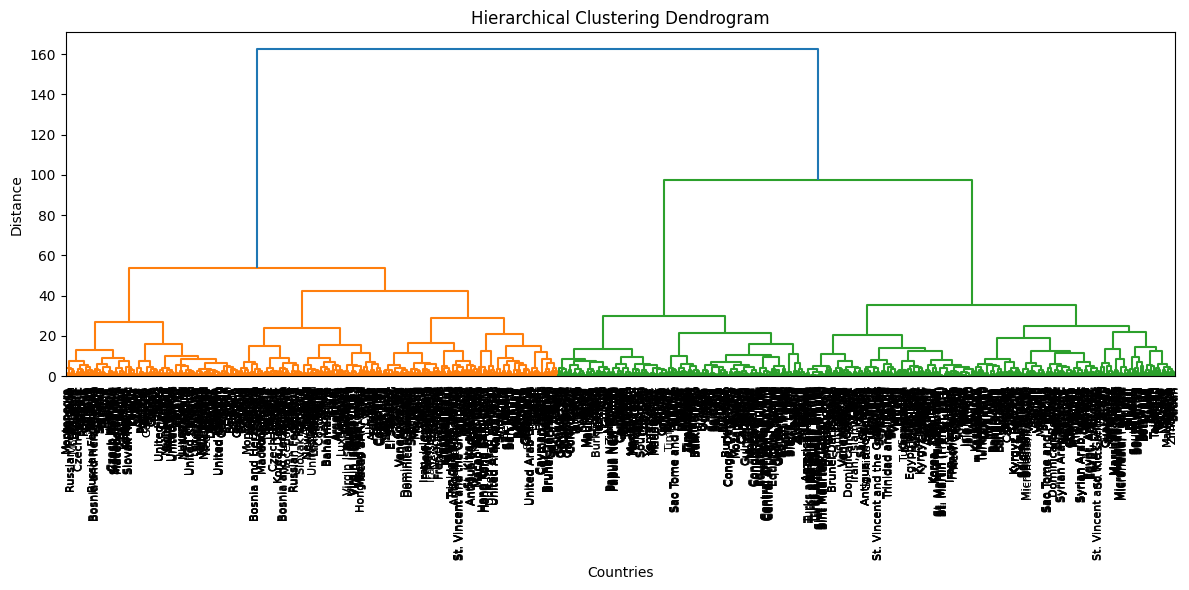

In [29]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# ----------------------------
# Use only the 19 numeric features for hierarchical clustering
# ----------------------------
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

X = df_scaled[numeric_features].values

# ----------------------------
# Compute linkage matrix
# Method options: 'single', 'complete', 'average', 'ward'
# ----------------------------
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# ----------------------------
# Plot dendrogram
# ----------------------------
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    labels=df_scaled['Country'].values,  # country names
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=None
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()



Silhouette Scores for Different Linkage Methods:
Ward: 0.284
Complete: 0.273
Average: 0.292
Single: -0.150


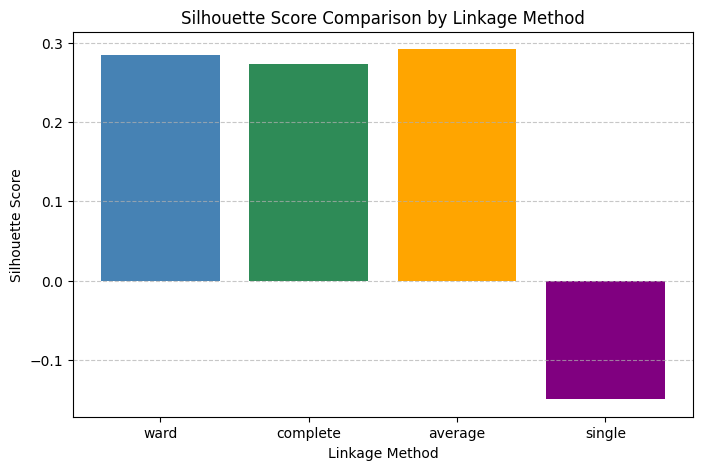

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist

# ----------------------------
# Step 1: Prepare numeric data (19 features only)
# ----------------------------
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

X = df_scaled[numeric_features].values

# ----------------------------
# Step 2: Define linkage methods to compare
# ----------------------------
methods = ['ward', 'complete', 'average', 'single']
silhouette_scores = {}

# ----------------------------
# Step 3: Compute silhouette score for each linkage
# ----------------------------
for method in methods:
    linkage_matrix = linkage(X, method=method, metric='euclidean')
    labels = fcluster(linkage_matrix, t=3, criterion='maxclust')  # 3 clusters

    if len(np.unique(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = np.nan

    silhouette_scores[method] = score

# ----------------------------
# Step 4: Display results
# ----------------------------
print("Silhouette Scores for Different Linkage Methods:")
for method, score in silhouette_scores.items():
    print(f"{method.capitalize()}: {score:.3f}")

# ----------------------------
# Step 5: Plot bar chart for visualization
# ----------------------------
plt.figure(figsize=(8, 5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['steelblue', 'seagreen', 'orange', 'purple'])
plt.title("Silhouette Score Comparison by Linkage Method")
plt.ylabel("Silhouette Score")
plt.xlabel("Linkage Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


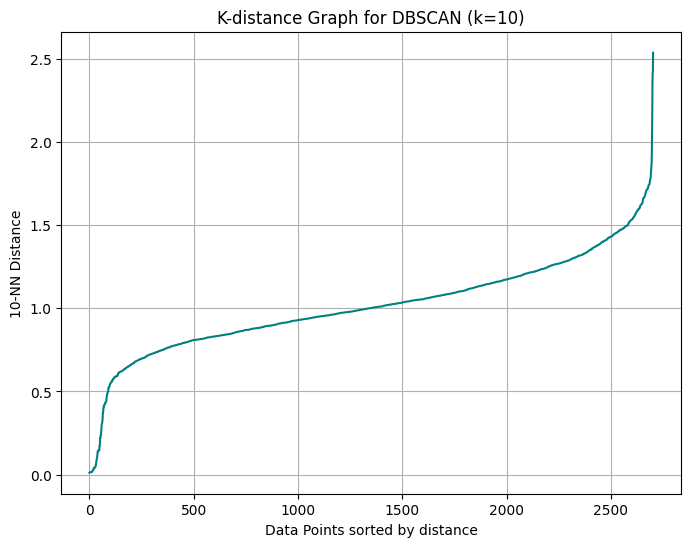

DBSCAN Found Clusters: 2
DBSCAN Silhouette Score: -0.06


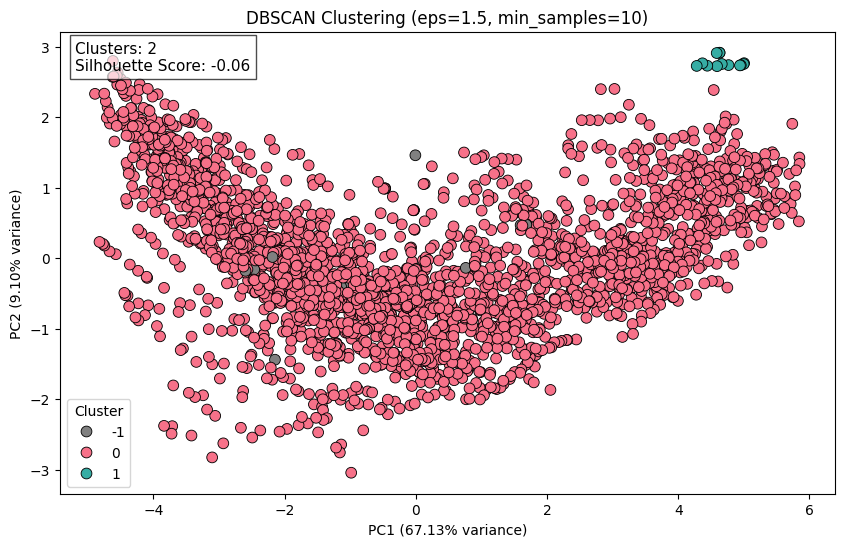

In [31]:

# ============================================
# 🧩 DBSCAN Clustering - Full Workflow
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ============================================
# Step 1: Prepare Scaled Data (19 numeric features only)
# ============================================
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

X_scaled = df_scaled[numeric_features].values  # numeric scaled data

# ============================================
# Step 2: Find Optimal Epsilon (k-distance graph)
# ============================================
min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances to the min_samples-th nearest neighbor
k_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,6))
plt.plot(k_distances, color='teal')
plt.title(f'K-distance Graph for DBSCAN (k={min_samples})')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{min_samples}-NN Distance')
plt.grid(True)
plt.show()

# ============================================
# Step 3: Apply DBSCAN
# ============================================


dbscan = DBSCAN(eps=1.5, min_samples=min_samples, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to DataFrame
df_scaled['DBSCAN_Cluster'] = dbscan_labels

# ============================================
# Step 4: Evaluate Results
# ============================================
unique_labels = set(dbscan_labels)
num_clusters = len(unique_labels) - (1 if -1 in dbscan_labels else 0)

print(f"DBSCAN Found Clusters: {num_clusters}")

# Compute Silhouette Score only if more than one cluster
if num_clusters > 1:
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.2f}")
else:
    silhouette_dbscan = np.nan
    print("DBSCAN formed only one cluster or noise; silhouette score not applicable.")

# ============================================
# Step 5: Visualize Clusters using PCA (2D)
# ============================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['DBSCAN_Cluster'] = dbscan_labels

# Custom color palette: noise (-1) = gray
palette = sns.color_palette("husl", num_clusters)
if -1 in dbscan_labels:
    palette = ['gray'] + palette  # add gray for noise

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='DBSCAN_Cluster',
    palette=palette,
    data=df_pca,
    s=60,
    edgecolor='black'
)

plt.title(f"DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# Show silhouette score and cluster count on plot
text = f"Clusters: {num_clusters}\nSilhouette Score: {silhouette_dbscan:.2f}" if num_clusters > 1 else "Only 1 cluster or noise"
plt.text(0.02, 0.98, text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

plt.legend(title='Cluster')
plt.show()


# Clustering + PCA Visualization

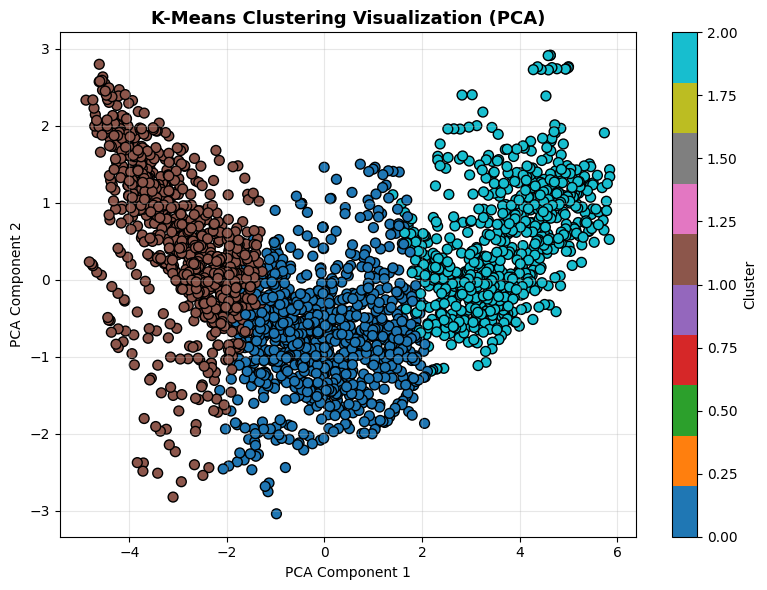

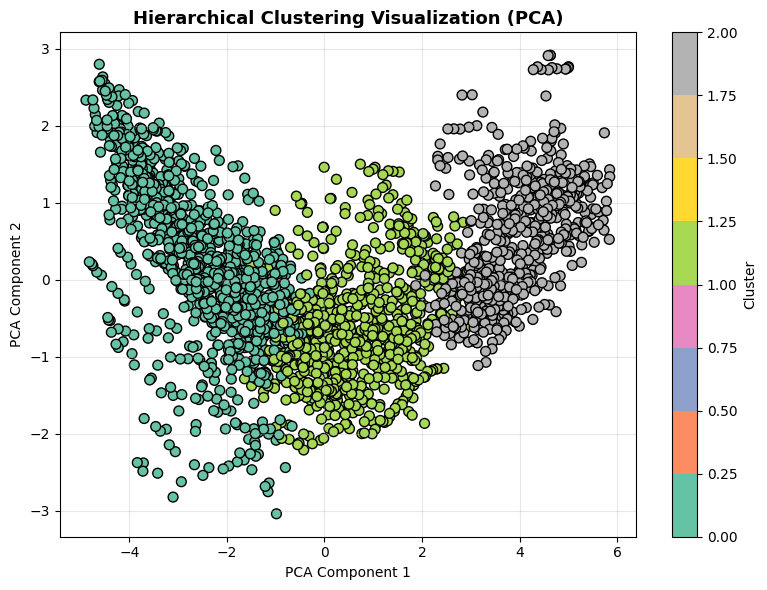

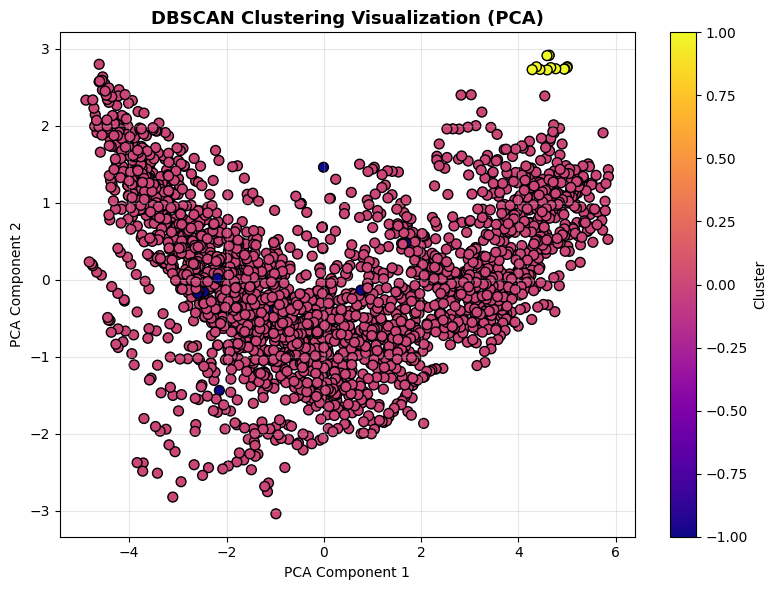

Silhouette Scores:
K-Means:       0.32
Hierarchical:  0.28
DBSCAN:        -0.06


In [32]:
# ============================================
# 🧩 Clustering + PCA Visualization
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# --------------------------------------------
# Step 1: Select only the 19 numeric features
# --------------------------------------------
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

numeric_df = df_scaled[numeric_features]

# --------------------------------------------
# Step 2: PCA for 2D visualization
# --------------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_df)

# --------------------------------------------
# Step 3: K-Means Clustering (3 clusters)
# --------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_df)

# --------------------------------------------
# Step 4: Hierarchical Clustering (3 clusters)
# --------------------------------------------
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(numeric_df)

# --------------------------------------------
# Step 5: DBSCAN Clustering
# --------------------------------------------

dbscan = DBSCAN(eps=1.5, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(numeric_df)

# --------------------------------------------
# Step 6: Visualization
# --------------------------------------------

# K-Means
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='tab10', s=50, edgecolor='k')
plt.title('K-Means Clustering Visualization (PCA)', fontsize=13, fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Hierarchical
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=hierarchical_labels, cmap='Set2', s=50, edgecolor='k')
plt.title('Hierarchical Clustering Visualization (PCA)', fontsize=13, fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# DBSCAN
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, cmap='plasma', s=50, edgecolor='k')
plt.title('DBSCAN Clustering Visualization (PCA)', fontsize=13, fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------------------------------------------
# Step 7: Silhouette Scores
# --------------------------------------------
print("Silhouette Scores:")
print(f"K-Means:       {silhouette_score(numeric_df, kmeans_labels):.2f}")
print(f"Hierarchical:  {silhouette_score(numeric_df, hierarchical_labels):.2f}")
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) != 2:
    # ensure DBSCAN has more than 1 cluster (ignores noise-only)
    print(f"DBSCAN:        {silhouette_score(numeric_df, dbscan_labels):.2f}")
else:
    print("DBSCAN:        Not applicable (only one cluster or noise)")


# Deployment

In [33]:
!pip install streamlit joblib -q
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb


--2025-10-30 10:09:50--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.10.0/cloudflared-linux-amd64.deb [following]
--2025-10-30 10:09:51--  https://github.com/cloudflare/cloudflared/releases/download/2025.10.0/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/c421f730-02a9-4b1f-bd27-4c5dd6645f82?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-30T11%3A08%3A47Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4d

In [34]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [35]:
!pip install streamlit cloudflared -q


In [43]:
%%writefile app.py
# ==============================================
# 🌍 Global Development Clustering App (CSV + Excel)
# ==============================================
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------
# Streamlit Page Configuration
# ----------------------------------------------
st.set_page_config(page_title="🌍 Global Development Clustering", layout="wide")

st.title("🌍 Global Development Clustering App")
st.markdown("""
Welcome! This app performs **K-Means Clustering** on global development datasets.
Upload your dataset in **CSV or Excel** format, preprocess it automatically, and visualize clusters.
""")

# ----------------------------------------------
# File Upload (CSV or Excel)
# ----------------------------------------------
uploaded_file = st.file_uploader("📤 Upload your dataset (.csv or .xlsx)", type=["csv", "xlsx"])

if uploaded_file:
    # ----------------------------------------------
    # Load Data (Detect Format)
    # ----------------------------------------------
    if uploaded_file.name.endswith(".csv"):
        df = pd.read_csv(uploaded_file)
    else:
        df = pd.read_excel(uploaded_file)

    st.success("✅ File uploaded successfully!")

    st.subheader("📋 Dataset Preview")
    st.dataframe(df.head())

    # ----------------------------------------------
    # Data Cleaning & Preprocessing
    # ----------------------------------------------
    st.subheader("🧹 Data Cleaning & Preprocessing")

    # Select only numeric columns
    df_numeric = df.select_dtypes(include=np.number)

    if df_numeric.empty:
        st.error("❌ No numeric columns found in the dataset! Please upload a dataset with numeric features.")
        st.stop()

    # Handle missing values
    df_numeric = df_numeric.fillna(df_numeric.mean())

    st.write(f"**Selected {df_numeric.shape[1]} numeric features** for clustering.")
    st.dataframe(df_numeric.describe().T)

    # ----------------------------------------------
    # Feature Scaling
    # ----------------------------------------------
    st.subheader("📏 Feature Scaling")
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_numeric)
    st.success("✅ Data scaling completed successfully.")

    # ----------------------------------------------
    # K-Means Clustering
    # ----------------------------------------------
    st.subheader("🤖 K-Means Clustering")
    n_clusters = st.slider("Select Number of Clusters (K):", 2, 10, 3)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df["Cluster"] = kmeans.fit_predict(scaled_data)

    st.write("✅ Clustering completed successfully!")
    st.write("**Cluster Centers (scaled values):**")
    st.dataframe(pd.DataFrame(kmeans.cluster_centers_, columns=df_numeric.columns))

    # ----------------------------------------------
    # PCA Visualization
    # ----------------------------------------------
    st.subheader("📊 Cluster Visualization using PCA")
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)
    df_pca = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])
    df_pca["Cluster"] = df["Cluster"]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(
        data=df_pca,
        x="PCA1", y="PCA2",
        hue="Cluster",
        palette="Set2",
        s=80, alpha=0.8
    )
    plt.title("PCA-based Cluster Visualization", fontsize=14)
    st.pyplot(fig)

    # ----------------------------------------------
    # Cluster Counts
    # ----------------------------------------------
    st.subheader("📈 Cluster Distribution")
    st.bar_chart(df["Cluster"].value_counts().sort_index())

    # ----------------------------------------------
    # Download Clustered Data
    # ----------------------------------------------
    st.subheader("💾 Download Clustered Dataset")
    csv_data = df.to_csv(index=False).encode("utf-8")
    st.download_button(
        label="📥 Download Clustered Dataset (CSV)",
        data=csv_data,
        file_name="clustered_dataset.csv",
        mime="text/csv"
    )

else:
    st.info("👆 Please upload a CSV or Excel file to begin.")

# ----------------------------------------------
# Footer
# ----------------------------------------------
st.markdown("""
---
🧠 **Developed by:** Your Name
📘 **Goal:** Cluster global countries based on development indicators
💡 **Tip:** Download the clustered dataset and use it later for supervised classification!
""")



Overwriting app.py


In [45]:
!nohup streamlit run app.py --server.port 8501 --server.headless true > logs.txt 2>&1 &
!sleep 3
!nohup cloudflared tunnel --url http://localhost:8501 --no-autoupdate > tunnel.log 2>&1 &
!sleep 5
!grep -o "https://.*trycloudflare.com" tunnel.log


https://disabled-chair-products-understanding.trycloudflare.com


In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [39]:
# --------------------------------------------
# Step 1: Prepare numeric data only
# --------------------------------------------
numeric_df = df_scaled.select_dtypes(include='number')

# ✅ Print features used in K-Means clustering
print("Features used in K-Means clustering:")
for i, feature in enumerate(numeric_df.columns):
    print(f"{i+1}. {feature}")

# --------------------------------------------
# Step 2: PCA for 2D visualization
# --------------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_df)

# --------------------------------------------
# Step 3: K-Means Clustering
# --------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_df)


Features used in K-Means clustering:
1. Birth Rate
2. CO2 Emissions
3. Energy Usage
4. GDP
5. Health Exp % GDP
6. Health Exp/Capita
7. Infant Mortality Rate
8. Internet Usage
9. Lending Interest
10. Life Expectancy Female
11. Life Expectancy Male
12. Mobile Phone Usage
13. Population 0-14
14. Population 15-64
15. Population 65+
16. Population Total
17. Population Urban
18. Tourism Inbound
19. Tourism Outbound
20. Cluster
21. DBSCAN_Cluster


In [40]:
from sklearn.cluster import KMeans
from google.colab import files

# ----------------------------
# Select numeric features
# ----------------------------
numeric_features = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
    'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
    'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Total',
    'Population Urban', 'Tourism Inbound', 'Tourism Outbound'
]

# ----------------------------
# K-Means Clustering
# ----------------------------
X = df_scaled[numeric_features].copy()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# ----------------------------
# Add Cluster column to dataset
# ----------------------------
df_scaled['Cluster'] = labels

# ----------------------------
# Save and Download
# ----------------------------
df_scaled.to_csv('clustered_dataset.csv', index=False)
print("✅ Cluster column added and dataset saved as 'clustered_dataset.csv'")

# Download file to your system
files.download('clustered_dataset.csv')


✅ Cluster column added and dataset saved as 'clustered_dataset.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# --------------------------------------------
# Import libraries
# --------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --------------------------------------------
# Load dataset
# --------------------------------------------
df = pd.read_csv("clustered_dataset.csv")

# --------------------------------------------
# Prepare features and target
# --------------------------------------------
# Keep only numeric columns
X = df.select_dtypes(include='number').drop(columns=['Cluster'])
y = df['Cluster']

# --------------------------------------------
# Split data into train/test sets
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------------
# Scale features
# --------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------
# Define all classification models
# --------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=150, learning_rate=0.1, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    )
}

# --------------------------------------------
# Train and evaluate models
# --------------------------------------------
results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# --------------------------------------------
# Summary of all model performances
# --------------------------------------------
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n📊 Model Performance Summary:")
print(results_df)



🚀 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.9871
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       210
           1       1.00      0.99      0.99       181
           2       0.98      0.99      0.98       150

    accuracy                           0.99       541
   macro avg       0.99      0.99      0.99       541
weighted avg       0.99      0.99      0.99       541


🚀 Training K-Nearest Neighbors...
✅ K-Nearest Neighbors Accuracy: 0.9445
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       210
           1       0.97      0.91      0.94       181
           2       0.96      0.98      0.97       150

    accuracy                           0.94       541
   macro avg       0.95      0.95      0.95       541
weighted avg       0.95      0.94      0.94       541


🚀 Training Decision Tree...
✅ Decision Tree Accuracy: 0.9538
              precision    r

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[10:10:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




✅ XGBoost Accuracy: 0.9704
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       210
           1       0.99      0.96      0.97       181
           2       0.99      0.97      0.98       150

    accuracy                           0.97       541
   macro avg       0.97      0.97      0.97       541
weighted avg       0.97      0.97      0.97       541


📊 Model Performance Summary:
                    Model  Accuracy
0     Logistic Regression  0.987061
5       Gradient Boosting  0.981516
4  Support Vector Machine  0.977819
3           Random Forest  0.970425
6                 XGBoost  0.970425
2           Decision Tree  0.953789
1     K-Nearest Neighbors  0.944547
